# Qiskit QRNG Hackathon - Setup

### This notebook will guide you through creating a true Quantum Random Number Generator.

In [1]:
# First, let's install the necessary libraries
!pip install qiskit
!pip install qiskit-aer
!pip install matplotlib
!pip install pylatexenc

print("\n--- Setup Complete ---")


--- Setup Complete ---


## 1. Building the Quantum Circuit

**Explanation:** The project brief asks us to create a truly random number generator. We'll use 3 qubits, which will give us $2^3 = 8$ possible outcomes (the numbers 0 through 7). To make each outcome "equally possible," the brief instructs us to use **H-gates** (Hadamard gates). The H-gate puts a qubit into a perfect superposition of $|0\rangle$ and $|1\rangle$.



Code that performs the following functionality:
1.  Creates a `QuantumCircuit` with 3 qubits and 3 classical bits.
2.  Applies a Hadamard (H-gate) to **all 3 qubits** to create the superposition.
3.  Adds a `measure` operation to measure all 3 qubits into the 3 classical bits.
4.  Prints the circuit diagram.

--- QRNG Circuit Diagram ---


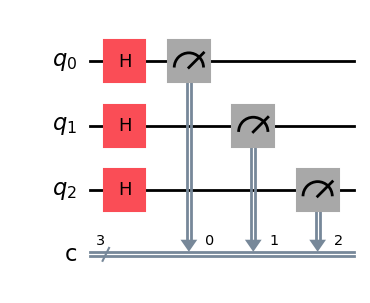

In [2]:
from qiskit import QuantumCircuit

# 1. Creates a QuantumCircuit with 3 qubits and 3 classical bits
n_qubits = 3
qc = QuantumCircuit(n_qubits, n_qubits)

# 2. Applies a Hadamard (H-gate) to all 3 qubits
qc.h(range(n_qubits))

# 3. Adds a measure operation
qc.measure(range(n_qubits), range(n_qubits))

# 4. Prints the circuit diagram
print("--- QRNG Circuit Diagram ---")
qc.draw('mpl')

## 2. Generating a Single Random Number (The Generator)

**Explanation:** Now that we have our circuit, we need to run it. The project brief "Tips" mention that by running the circuit once and measuring once, "the first outcome to be measured will be your answer". We will run our circuit on a high-performance `AerSimulator`. We then "assign numeric values" by converting the measured binary string (like '101') into a decimal number (like 5).

Code that performs the following functionality:
1.  Initializes the `AerSimulator`.
2.  Runs the circuit from Exercise 1 for a **single shot** (`shots=1`).
3.  Gets the single result (e.g., '101').
4.  Converts that binary string result into its decimal integer and prints it.

In [3]:
from qiskit_aer import AerSimulator

# 1. Initializes the AerSimulator
simulator = AerSimulator()

# 2. Runs the circuit for a single shot
job_single = simulator.run(qc, shots=1)
result_single = job_single.result()
counts_single = result_single.get_counts()

# 3. Gets the single result
measured_state = list(counts_single.keys())[0]

# 4. Converts and prints the random number
random_number = int(measured_state, 2)

print(f"--- Your Truly Random Number (0-7) ---")
print(f"Measured state: {measured_state}")
print(f"Random Number: {random_number}")

--- Your Truly Random Number (0-7) ---
Measured state: 011
Random Number: 3


## 3. Proving the Quantum Nature (The Proof)

**Explanation:** We have a random number, but how do we *prove* it's truly random? The "Tips" section says running the circuit multiple times will "demonstrate the fact that your qubits are in a quantum state of superposition". We should get "$n$ equal buckets of measurement results, showing that each quantum state was equally likely".

Code that performs the following functionality:
1.  Runs the same circuit (from first code) using the `AerSimulator` for **1024 shots**.
2.  Gets the dictionary of `counts` (the "equal buckets" of results).
3.  Prints the `counts`.
4.  Uses `plot_histogram` to display a graph of the results (this is your key demo!).

--- Proof of Equal Probability (1024 shots) ---
These are the 'n equal buckets' of results:
{'010': 144, '000': 125, '100': 138, '011': 117, '111': 121, '001': 140, '110': 132, '101': 107}

--- Histogram (Visual Proof) ---


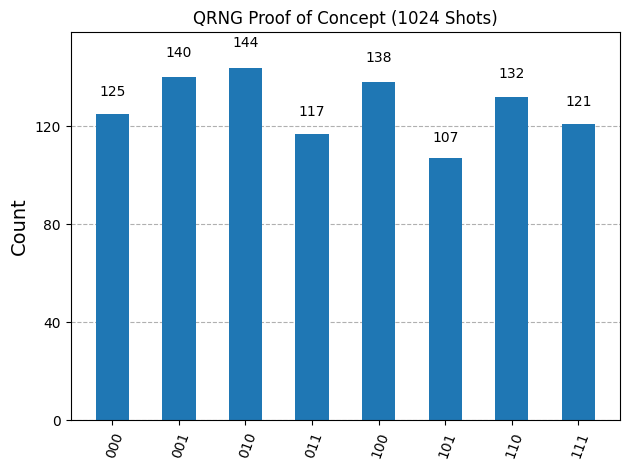

In [4]:
from qiskit.visualization import plot_histogram

# 1. Runs the circuit for 1024 shots
shots_many = 1024
job_many = simulator.run(qc, shots=shots_many)
result_many = job_many.result()

# 2. Gets the dictionary of counts
counts_many = result_many.get_counts()

# 3. Prints the counts
print(f"--- Proof of Equal Probability ({shots_many} shots) ---")
print("These are the 'n equal buckets' of results:")
print(counts_many)

# 4. Uses plot_histogram to display a graph
print("\n--- Histogram (Visual Proof) ---")
plot_histogram(counts_many, title="QRNG Proof of Concept (1024 Shots)")